<a href="https://colab.research.google.com/github/ghazianhanafi/Climate-Station-Operational-Automation/blob/main/WRK000_IKROAnalyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BULETIN BULANAN IKLIM MIKRO
###oleh: Ghazian Hirzi Hanafi

##IKRO

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


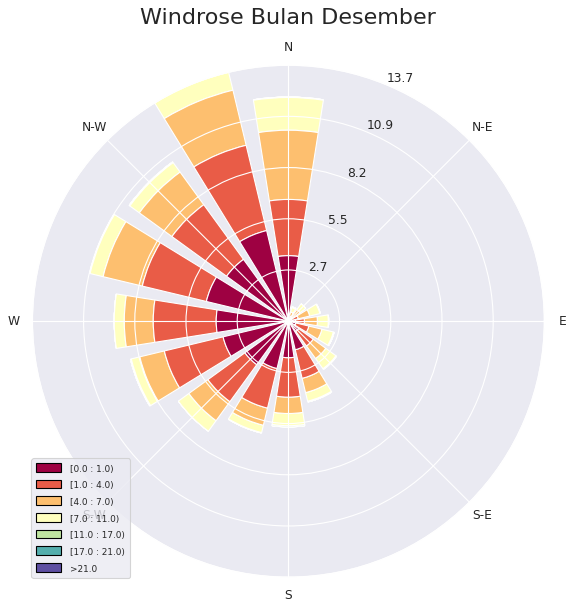

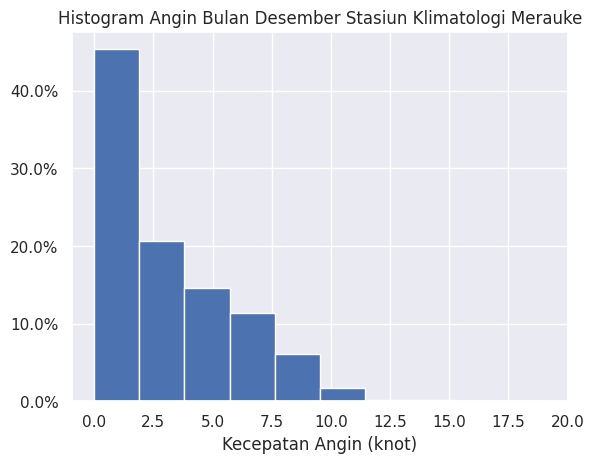

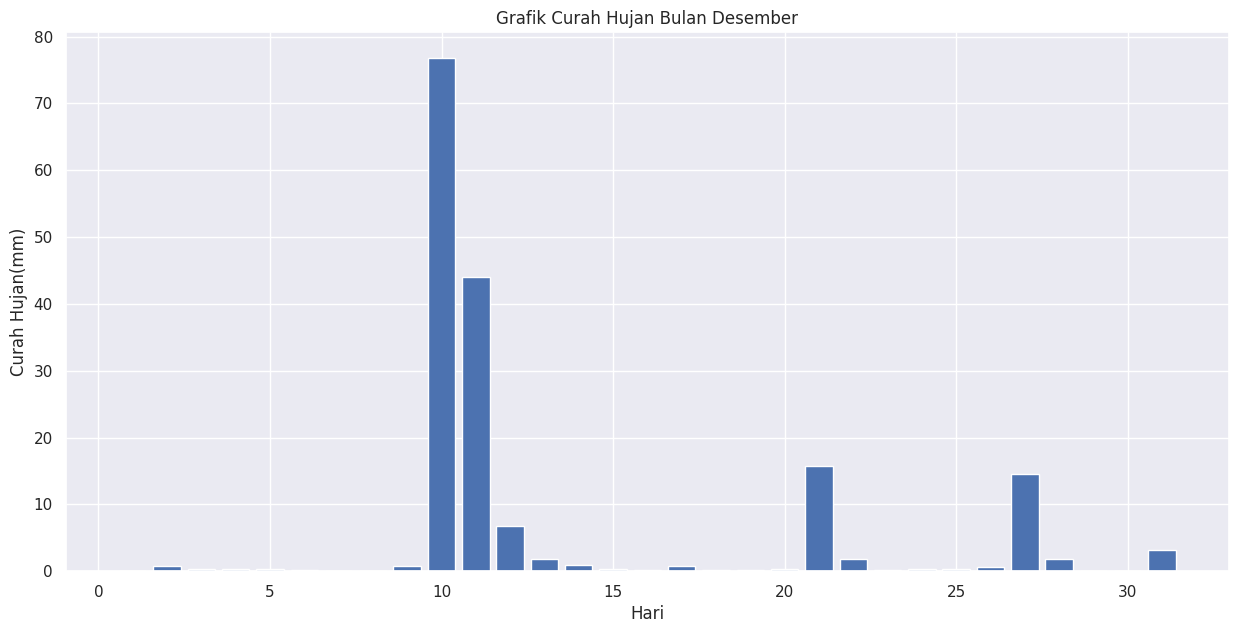

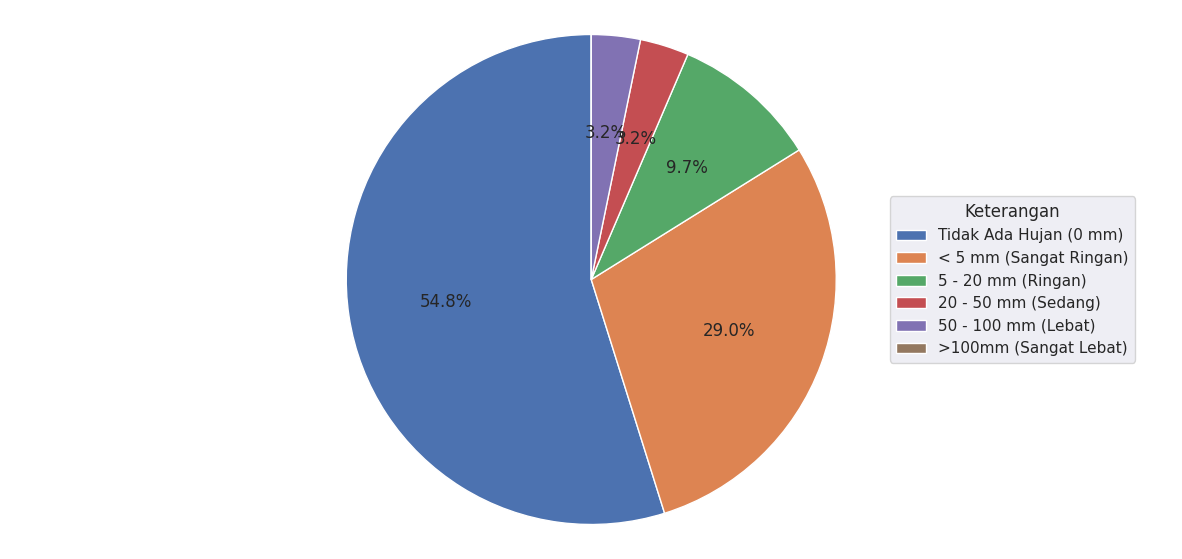

<ipython-input-2-8afb102f81c7>:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftt['Timestamp']=pd.to_datetime(data1[data1.columns[0]])


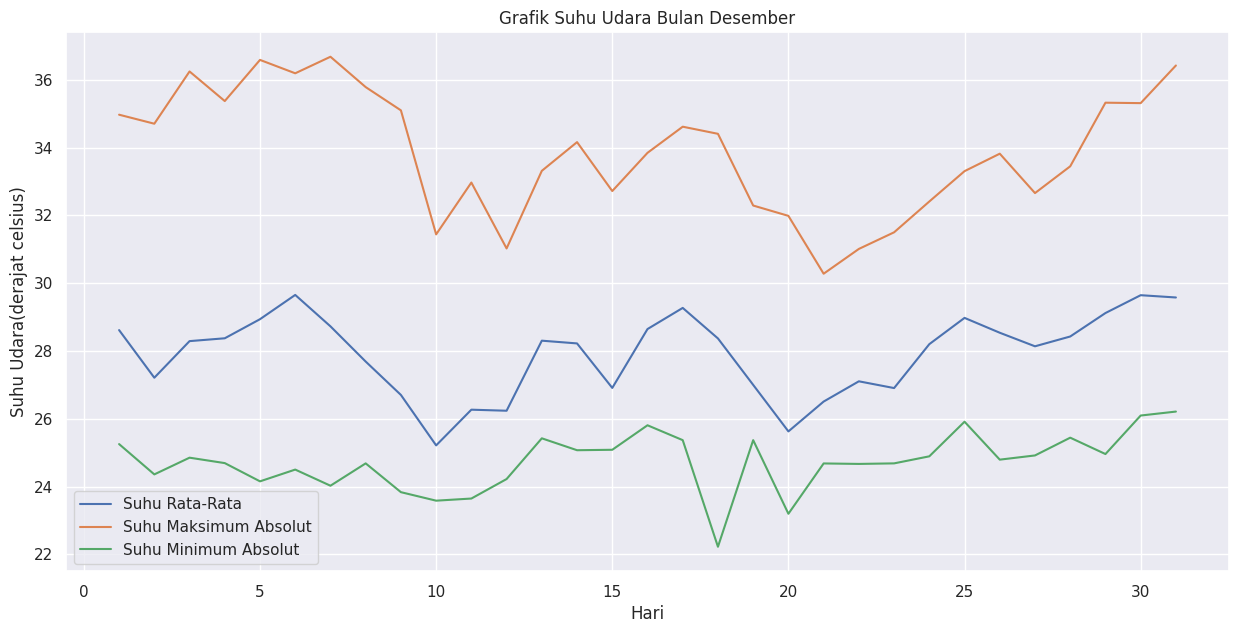

<ipython-input-2-8afb102f81c7>:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfrh[dfrh.columns[0]]=pd.to_datetime(dfrh[dfrh.columns[0]])
<ipython-input-2-8afb102f81c7>:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsr['Timestamp']=pd.to_datetime(data1[data1.columns[0]])
<ipython-input-2-8afb102f81c7>:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

Text(0.5, 1.0, 'Grafik Lama Penyinaran Matahari Bulan Desember')

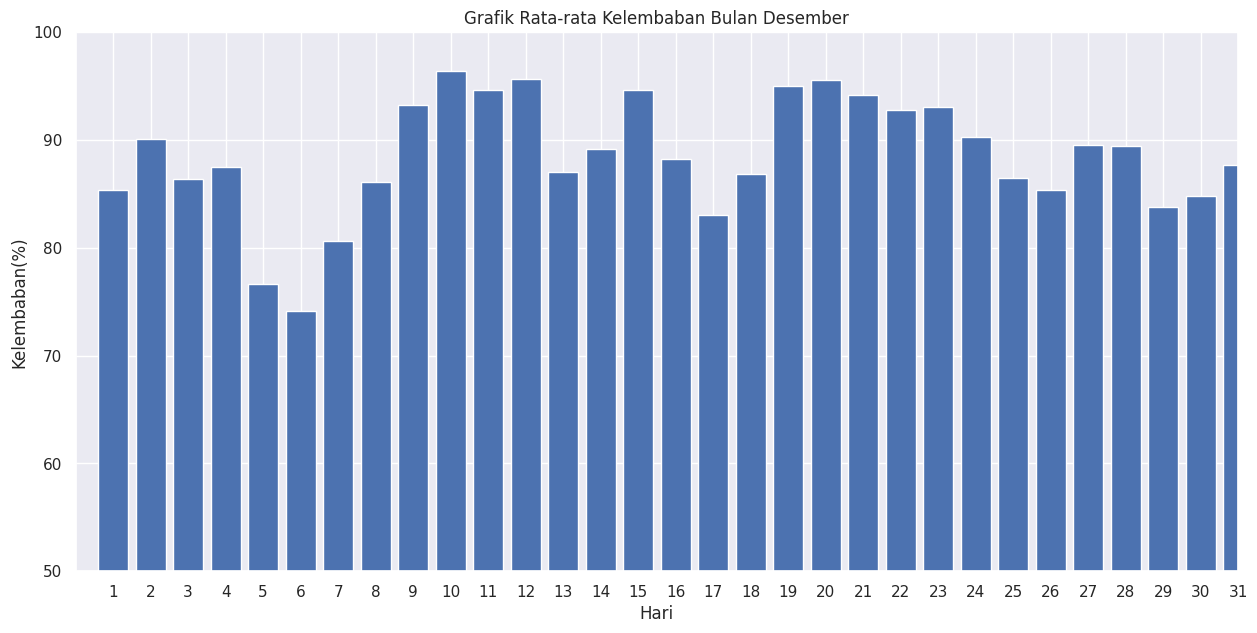

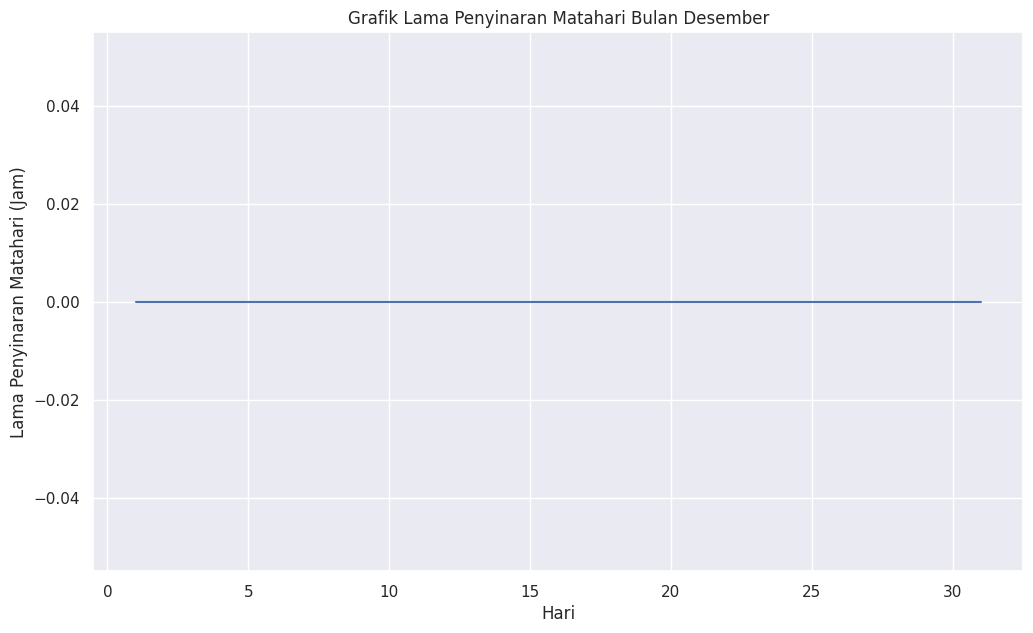

In [ ]:
#  File:
#    IKROAAWS.py
#  Synopsis:
#    Iklim Mikro Operasional Buletin: Analisis Variabel Cuaca Iklim
#  Author:
#    Ghazian Hirzi Hanafi
#  Date of initial publication:
#    Januari 2023
#-------load package--------#
#==========JANGAN LUPA DISESUAIKAN=========###########

dataaws='2312AAWS.csv'

#==========JANGAN LUPA DISESUAIKAN=========###########
!pip install windrose
!pip install translators --upgrade
import numpy as np
import pandas as pd
import windrose
from windrose import WindroseAxes
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import datetime
import calendar
import locale
import translators as ts
import translators as ts
import translators.server as tss
from google.colab import drive
# Create translation model
drive.mount('/content/drive/')
path='/content/drive/My Drive/IKRO/'

#---------------INPUT DATA-----------------#
#==========JANGAN LUPA DISESUAIKAN=========#
#today = datetime.date.today()
#first = today.replace(day=1)
#last_month = first - datetime.timedelta(days=2)
lm=dataaws[2:-8]
lmn=int(lm)
#nmeng = ['January', 'Februari', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'];
nmid = {'01':'Januari','02': 'Februari', '03':'Maret', '04':'April', '05':'Mei','06': 'Juni', '07':'Juli','08': 'Agustus','09': 'September', '10':'Oktober', '11':'November','12': 'Desember'};
Bulan=lm#(calendar.month_name[lmn])
#for word in Bulan:
#    try:
#        translation = nmid[word]
for key, value in nmid.items():
    Bulan = Bulan.replace(key, value)
    #except:
     #   pass
#Bulan=tss.google(Bulan, from_language='en', to_language='id')
#data1 = pd.read_csv(data_dir+"*.csv")
#==========JANGAN LUPA DISESUAIKAN=========#
#---------------INPUT DATA-----------------#
#---------cleaning data----------
data1 = pd.read_csv(path+dataaws)
#data2 = pd.read_csv('decmei2022aaws.csv')
#data1 = pd.concat([data1,data2])
x=range(32,67)
data1 = data1.drop(data1.columns[x],axis= 1)
data1 = data1.drop(data1.columns[1],axis= 1)
data1['Timestamp']=pd.to_datetime(data1['Timestamp'])
data1 = data1[data1['Timestamp'].dt.strftime('%m') == lm]
data1= data1.dropna()
ws=data1[data1.columns[1]]*1.98
wd=data1[data1.columns[3]]
#---------proses windrose--------#
ax = WindroseAxes.from_ax()
cmap = plt.get_cmap('Spectral')
cbmrk=np.array([ 0,  1,  4,  7, 11, 17, 21])
ax.bar(wd,ws, normed=True, opening=0.8, edgecolor='white',cmap=cmap,bins=cbmrk)
ax.set_title(f'Windrose Bulan {Bulan}',pad=15, fontsize=20)
ax.set_legend()
plt.show()
#---------Histogram Angin----------#
sns.set_theme(style="darkgrid")
plt.hist(ws, weights=np.ones(len(ws)) / len(ws))
plt.title(f"Histogram Angin Bulan {Bulan} Stasiun Klimatologi Merauke")
plt.xlabel("Kecepatan Angin (knot)")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()
#-------Curah Hujan-------------#
#KAMINGSUN
dfch=data1[data1['Timestamp'].dt.strftime('%H:%M') == '00:00']
dfch=dfch[[data1.columns[0],data1.columns[9]]]
dfch[dfch.columns[0]]=pd.to_datetime(dfch[dfch.columns[0]])
dfchm=dfch
dfchm['day']=pd.DatetimeIndex(dfchm[dfchm.columns[0]]).day

fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
ax.bar(dfchm[dfchm.columns[2]], dfchm[dfchm.columns[1]])

ax.set_ylabel('Curah Hujan(mm)')
ax.set_xlabel('Hari')
ax.set_title(f'Grafik Curah Hujan Bulan {Bulan}')
plt.show()

labels =['Tidak Ada Hujan (0 mm)', '< 5 mm (Sangat Ringan)', '5 - 20 mm (Ringan)', '20 - 50 mm (Sedang)', '50 - 100 mm (Lebat)','>100mm (Sangat Lebat)']
dfchm['group'] = pd.cut(dfchm[dfchm.columns[1]], (0,0.5,5,20,50,100,900), right=False, labels=labels)


xin=dfchm['group'].value_counts()
labels=xin.index
sizes = xin
fig1, ax1 = plt.subplots()
fig1.set_size_inches(15, 7)
ax1.pie(sizes, autopct=lambda pct: '{:1.1f}%'.format(pct) if pct > 0 else '', startangle=90)
ax1.legend( labels,
          title="Keterangan",
          loc="center left",
          bbox_to_anchor=(0.75, 0, 0, 1))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title(f'Grafik Sebaran Curah Hujan Bulan {Bulan}')
plt.show()
#plt.show()
#-------Suhu Udara -------------#
dftt=data1[data1.columns[4:7]]
dftt['Timestamp']=pd.to_datetime(data1[data1.columns[0]])
dfta=dftt.resample('D', on='Timestamp').mean()
dftx=dftt.resample('D', on='Timestamp').max()
dftn=dftt.resample('D', on='Timestamp').agg(['min', 'count'])
dft=pd.DataFrame().assign(tavg=dfta[dfta.columns[0]],tmax=dftx[dftx.columns[1]],tmin=dftn[dftn.columns[2]])
dft['day']=pd.DatetimeIndex(dft.index).day
dft['day']=dft['day'].astype("category")

fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
ax.plot(dft[dft.columns[3]], dft[dft.columns[0]],dft[dft.columns[3]], dft[dft.columns[1]],dft[dft.columns[3]], dft[dft.columns[2]])

ax.set_ylabel('Suhu Udara(derajat celsius)')
ax.set_xlabel('Hari')
ax.set_title(f'Grafik Suhu Udara Bulan {Bulan}')
plt.legend(['Suhu Rata-Rata','Suhu Maksimum Absolut','Suhu Minimum Absolut'],loc='best')
plt.show()
#-----------RH------------------#
dfrh=data1[[data1.columns[0],data1.columns[7]]]
dfrh[dfrh.columns[0]]=pd.to_datetime(dfrh[dfrh.columns[0]])
dfrhm=dfrh.resample('D', on='Timestamp').mean()
dfrhm['day']=pd.DatetimeIndex(dfrhm.index).day
dfrhm['day']=dfrhm['day'].astype("category")


fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
ax.bar(dfrhm[dfrhm.columns[1]], dfrhm[dfrhm.columns[0]])

ax.set_ylabel('Kelembaban(%)')
ax.set_xlabel('Hari')
ax.set_title(f'Grafik Rata-rata Kelembaban Bulan {Bulan}')
plt.ylim(80,100)
ax.margins( y=-0.25)
#plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
ax.set_xticks(dfrhm['day'])
plt.ylim(50,100)
plt.xlim(0,31)

#------------Sun Radiation----------------#
dfsr=data1[data1.columns[10:11]]
dfsr['Timestamp']=pd.to_datetime(data1[data1.columns[0]])
dfsr.loc[dfsr[dfsr.columns[0]] < 140, 'sd'] = 0
dfsr.loc[dfsr[dfsr.columns[0]] > 140, 'sd'] = round(((dfsr[dfsr.columns[0]]/140)/60),2)
dfsr=dfsr.resample('D', on='Timestamp').sum()
#dfsr['sd'].plot()
dfch=data1[data1['Timestamp'].dt.strftime('%H:%M') == '00:00']
dfch=dfch[[data1.columns[0],data1.columns[9]]]
dfch[dfch.columns[0]]=pd.to_datetime(dfch[dfch.columns[0]])
dfchm=dfch
dfchm['day']=pd.DatetimeIndex(dfchm[dfchm.columns[0]]).day
fig, ax0 = plt.subplots()
#fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
#ax0.bar(dfchm[dfchm.columns[2]], dfchm[dfchm.columns[1]])
ax0.plot(dfchm[dfchm.columns[2]],dfsr[dfsr.columns[1]])
ax0.set_ylabel('Lama Penyinaran Matahari (Jam)')
ax0.set_xlabel('Hari')
ax0.set_title(f'Grafik Lama Penyinaran Matahari Bulan {Bulan}')


#plt.savefig(f'PAPSEL{str(i).zfill(2)}.png')
#-----------Save------------------#
#-----------Analisis--------------#
#KAMINGSUN
#ws.describe()
#np.quantile(ws, [0,0.25,0.5,0.75,1])
#mks=""
#kal1 = f"Grafik disamping merupakan\
#grafik windrose beserta grafik histogram distribusi angin \
#di Stasiun Klimatologi Merauke pada Bulan {Bulan} Tahun 2022."
#kal2 = f"Berdasarkan grafik tersebut terlihat bahwa secara umum, kondisi angin pada Bulan {Bulan} "
#kal3 = f"di Stasiun Klimatologi Merauke menunjukkan arah angin dominan {mks} "
#for x in range(1,4):
#    analisisangin=(f"kal{x}")
#analisisangin= kal1 + kal2+kal3
#print(analisisangin)

In [ ]:
lm

'10'